# MATRICES y VALORES Y VECTORES PROPIOS

Esta guía está diseñada para explorar conceptos importantes de álgebra lineal, específicamente relacionados con matrices, autovalores y autovectores.

## Objetivos de Aprendizaje
- Crear y manipular matrices en Python usando NumPy
- Calcular los valores propios y vectores propios de una matriz 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

# Configuración para mejor visualización
np.set_printoptions(precision=4, suppress=True)

## 1. Definición de una Matriz A de 4×3

Primero, vamos a definir una matriz A de dimensiones 4×3. Esta es una matriz rectangular (no cuadrada) con 4 filas y 3 columnas.

In [4]:
# Definimos una matriz A de 4×3
A = np.array([
    [2, 1, 0],
    [1, 3, 2],
    [0, 2, 4],
    [1, 0, 3]
])

print("Matriz A:")
print(A)
print("\nDimensiones de A:", A.shape)

Matriz A:
[[2 1 0]
 [1 3 2]
 [0 2 4]
 [1 0 3]]

Dimensiones de A: (4, 3)


## Primera parte

1. Calcula la dimensión de $A,A^TA$ y $AA^T$
¿Tienen la mismo rango estas matrices por que tiene se puede predecir esto? (Puedes usar un código para realizar este cálculo)

2. Calculo los vectores propios y valores propios de $AA^T$, para cada uno de ellos, verifica si los vectores propios son ortogonales entre sí. ¿Estos vectores forman una base de $\mathbb{R}^4$?, ¿por qué? ¿cómo podemos completarla? Organiza los valores propios de la forma $\lambda_1 \geq \lambda_2 \geq \lambda_3 \geq \lambda_4$ y y los vectores propios asociados como $u_1,u_2,u_3,u_4$.
3. Calculo los vectores propios y valores propios de $A^TA$, para cada uno de ellos, verifica si los vectores propios son ortogonales entre sí. ¿Por qué es importante esta propiedad? ¿Estos vectores forman una base de $\mathbb{R}^3$?, ¿por qué? ¿cómo podemos completarla? Organiza los valores propios de la forma $\lambda_1 \geq \lambda_2 \geq \lambda_3$ y los vectores propios asociados como $v_1,v_2,v_3$.

4. Como puedo justificar que los valores propios diferentes de cero  de $A^TA$ y $AA^T$ son iguales 

5. Si calculamos la siguiente matriz $u_1v_1^T$ ¿Cual es el rango?¿Por que?

6. Definamos $\sigma_1 = \sqrt{\lambda_1},\sigma_2 = \sqrt{\lambda_2},\sigma_3 = \sqrt{\lambda_3}$ y $\sigma_4 = 0$ y definamos la matriz diagonal $\Sigma$ como $\Sigma = diag(\sigma_1,\sigma_2,\sigma_3,\sigma_4)$, y realiza el siguiente cálculo

$$A_1=\sigma_1u_1v_1^T$$
$$A_2=\sigma_1u_1v_1^T+\sigma_2u_2v_2^T$$
$$A_3=\sigma_1u_1v_1^T+\sigma_2u_2v_2^T+\sigma_3u_3v_3^T$$


¿Cual es el rango de cada una de estas matrices? ¿Por qué? ¿Qué relación tienen con la matriz $A$? 

Lo que acabamos de realizar se llama la factorización de SVD (Singular Value Decomposition) de la matriz $A$. Que consiste en descomponer la matriz $A$ en el producto de tres matrices: $U$, $\Sigma$ y $V^T$. Donde $U$ es una matriz ortogonal que contiene los vectores propios de $AA^T$, $\Sigma$ es una matriz diagonal que contiene los valores singulares (raíz cuadrada de los valores propios de $A^TA$) y $V^T$ es la transpuesta de una matriz ortogonal que contiene los vectores propios de $A^TA$. Vamos a usar esta técnica para comprimir la imagen de un gato.

## Segunda parte

Aqui vamos importar la fotografia de un gato y la vamos a transformar en una matriz en escala de grises, ademas la vamos a guardar en una matriz llamada gato

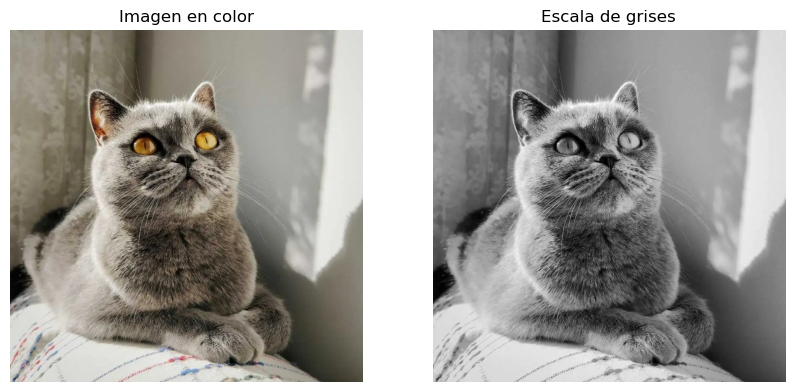

Forma de la matriz: (945, 945)
Fragmento de la matriz:
 [[143 147 151 155 155]
 [143 147 151 155 155]
 [143 147 151 155 155]
 [143 147 151 155 155]
 [143 147 151 155 155]]


In [ ]:
import requests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from io import BytesIO



# URL de una imagen de gato (libre de derechos)
url = "https://hankpets.com/wp-content/uploads/2024/12/British-Shorthair.jpg.webp"

# Paso 1: Descargar la imagen desde la web
respuesta = requests.get(url)
imagen_color = Image.open(BytesIO(respuesta.content))

# Paso 2: Convertir la imagen a escala de grises
imagen_gris = imagen_color.convert("L")

# Paso 3: Convertir la imagen en escala de grises a una matriz NumPy
gato = np.array(imagen_gris)

# Paso 4: Mostrar la imagen original y en escala de grises
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Imagen en color")
plt.imshow(imagen_color)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Escala de grises")
plt.imshow(gato, cmap="gray")
plt.axis('off')

plt.show()




7. Encuentra las dimensiones, el rango y la dimensión del núcleo de la matriz gato

8. Con base en el calculo anterior cuantos vectores propios tendrían asociados las matrices $gato^Tgato$ y $gatogato^T$? ¿Por qué?

9. El siguiente código produce tres matrices $U$, $\Sigma$ y $V^T$ que son la descomposición SVD de la matriz gato. ¿Cuáles son las dimensiones de cada una de estas matrices?



In [12]:
U, S, VT = np.linalg.svd(gato)

10. Comprueba que las columnas de $U$ son ortogonales entre sí. Adicionalmente, son vectores propios de la matriz $gato^Tgato$ y los valores propios son los cuadrados de los elementos del vector $S$
11. Comprueba que las columnas de $V$ son ortogonales entre sí. Adicionalmente, son vectores propios de la matriz $gatogato^T$ y los valores propios son los cuadrados de los elementos del vector $S$

12. Calcule el producto $\sigma U_1V_1^T$ y verifica que es igual a la matriz $A_1$ que calculamos antes. ¿Por qué? ¿Qué relación tiene con la matriz $A$? ¿Cual es su dimensión? ¿Por qué?


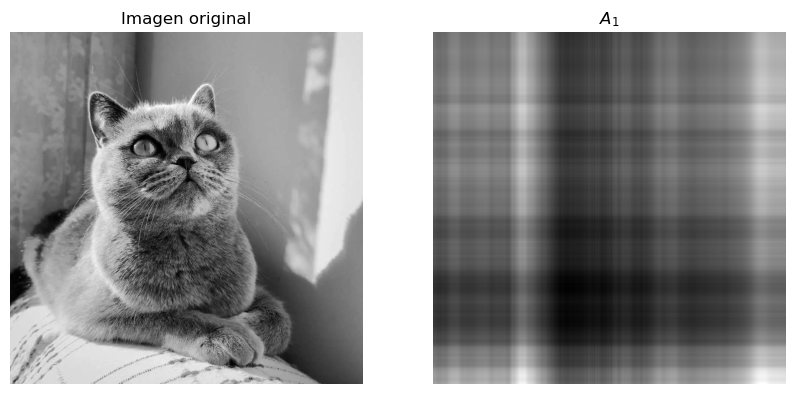

In [18]:
A_1 = S[0] * np.outer(U[:, 0], VT[0, :])

# Paso 6: Mostrar la imagen original y la aproximación
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.title("Imagen original")
plt.imshow(gato, cmap="gray")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("$A_1$")
plt.imshow(A_1, cmap="gray")
plt.axis('off')
plt.show()

El siguiente construye la matriz $A_i$ de la siguiente forma 

$$A_1=\sigma_1u_1v_1^T$$
$$A_2=\sigma_1u_1v_1^T+\sigma_2u_2v_2^T$$
$$A_3=\sigma_1u_1v_1^T+\sigma_2u_2v_2^T+\sigma_3u_3v_3^T$$
$$...$$
$$A_k=\sum_{i=1}^k \sigma_iu_iv_i^T$$

y muestra la imagen  producida en    $A_k$



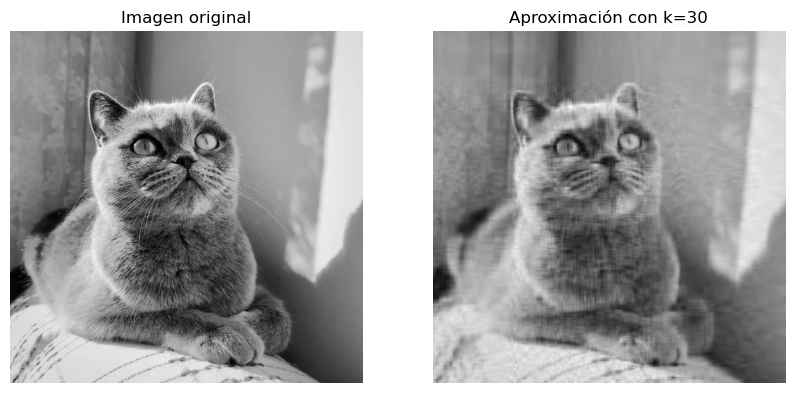

In [25]:
# El siguiente construye la matriz A_i de la siguiente forma 


k= 30



# Construcción de A_k
A_k = np.zeros_like(gato, dtype=float)
for i in range(k):
    A_k += S[i] * np.outer(U[:, i], VT[i, :])

# Mostrar la imagen original y la aproximación A_k
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Imagen original")
plt.imshow(gato, cmap="gray")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Aproximación con k={k}")
plt.imshow(A_k, cmap="gray")
plt.axis('off')

plt.show()

13. ¿Con que valor de $k$ la imagen se ve igual a la original? ¿Por qué? ¿Qué relación tiene con el rango de la matriz gato? ¿Cómo puede esto ser útil en la compresión de imágenes?